# Анализ данных по апартаментам сервиса Airbnb и выявление факторов популярности жилья

Автор Гореничий Никита Сергеевич



 Набор данных содержит в себе информацию с сайта Airbnb в Нью-Йорке, расположение географически, количество отзывов и всю нужную информацию, чтобы понять востребованы ли данные апартаменты или нет.
 
Цель: понять, какие апартаменты популярны для аренды





Пояснение данных

id	порядковый номер арендадателя

name	имя арендадателя

host_id	порядковый номер гостя

host_name	имя гостя

neighbourhood_group	район, в котором находится квартира

neighbourhood	окрестность

latitude	координаты

longitude	координаты

room_types	тип квартиры

price	цена за ночь

minimum_nights	минимальное количество ночей

number_of_reviews	количество отзывов

last_review	дата последнего отзыва

reviews_per_month	среднее количество отзывов в месяц

calculated_host_listings_count	количество броней

availability_365	количество дней, когда квартира свободна

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

airbnb = pd.read_csv("airbnb.csv")
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


 # 1. Где больше всего мест для аренды?
 

В таблице 48895 строк, каждая строка - сделка по снятию жилья конкретным человеком, поэтому один и тот же арендодатель может встречаться в строках несколько раз. Проверим это:

In [2]:
airbnb.groupby('name').size().sort_values(ascending=False) # действительно

name
Hillside Hotel                                     18
Home away from home                                17
New york Multi-unit building                       16
Brooklyn Apartment                                 12
Private Room                                       11
                                                   ..
Penthouse 1 bedroom in LIC                          1
Penthouse - 2 Floors with Private Outdoor Patio     1
Penthouse + private patio in Williamsburg           1
Penthouse                                           1
 1 Bed Apt in Utopic Williamsburg                   1
Length: 47905, dtype: int64

Возможное такое, что разные отели имеют одинаковое название, поэтому выше приведенные данные не полностью отражают действительную картину по количеству сделок одного и того же хозяина, но как мы видим ниже, в худшем случае мы получим ошибку в 645 сделок, что состовляет 1.3% от общего количества сделок, поэтому данным нюансом можно пренебречь.

In [3]:
(airbnb.groupby('name').size() > 1).sum()

645

В столбце 'name' присутствуют пустые значения:

In [4]:
airbnb[airbnb['name'].isna()].reset_index(drop=True).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
1,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
2,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
3,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
4,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0


Можно заменить пустые значения на "Unknown", но поскольку от общего числа сделок доля сделок с неизвестным названием хоста составляет всего 0.03% можно пренебречь этими сделками и очистить таблицу от "грязных данных" :

In [5]:
airbnb_clean = airbnb[airbnb['name'].notna()]

### 1.1 Количество мест для аренды по районам

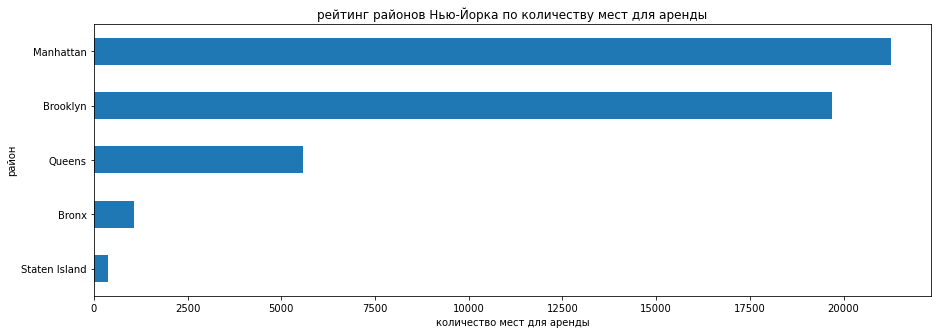

In [6]:
#посчитаем количество уникальных значений по столбцу 'name' в каждом районе и визуализируем данные
airbnb_clean.groupby('neighbourhood_group')['name'].nunique().sort_values().plot(kind='barh', figsize=(15,5));
plt.title('рейтинг районов Нью-Йорка по количеству мест для аренды');
plt.xlabel('количество мест для аренды');
plt.ylabel('район');

Наибольшее количество мест для аренды наблюдается в районе Манхэттен

# 2. Как места для жилья отличаются по цене?

Проверим столбец 'price' на корректность данных:

In [7]:
airbnb[airbnb['price'].isna()] # пустых значений нет

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [8]:
airbnb.query('price == 0').reset_index(drop=True).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
1,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
2,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
3,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
4,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


В столбце price присутствуют нулевые значения. Это можно интерпретировать по-разному. Возможно, данное жилье клиенту досталось бесплатно по какой-либо причине, но это не отражает реальной стоимости данного жилья и это испортит нам статистику. Кроме того, сделки с 0 ценой составляют 0.22 % от общего количества сделок, поэтому я решил не учитывать эти сделки.

### 2. 1 Построим ящичную диаграмму распределения цены в зависимости от района, в котором находится жилье

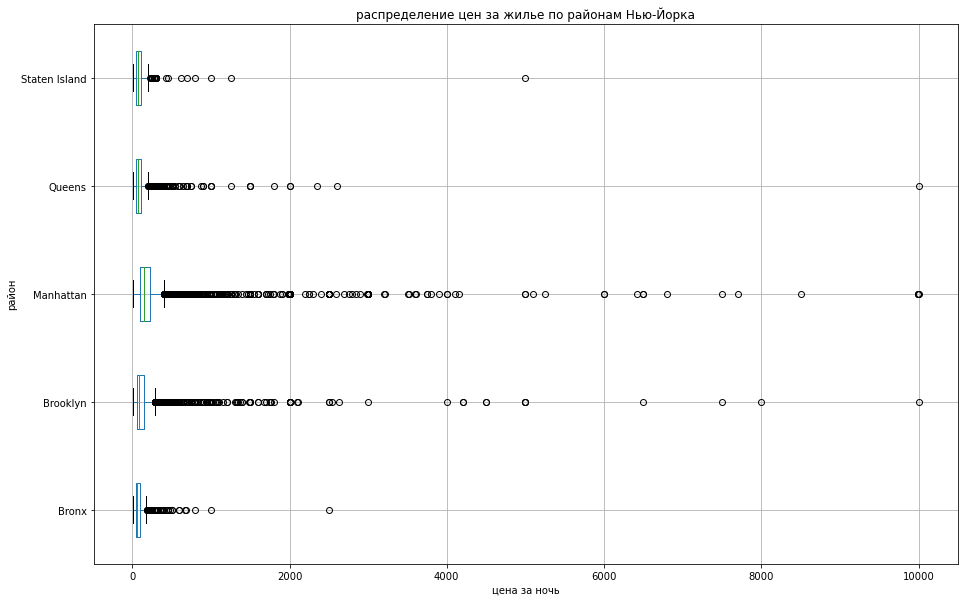

In [9]:
airbnb_clean[airbnb_clean.eval("price !=0")].boxplot(column='price', by='neighbourhood_group',figsize=(15,10), vert=False);
plt.title('распределение цен за жилье по районам Нью-Йорка');
plt.xlabel('цена за ночь');
plt.ylabel('район');
plt.suptitle('');

В районах Bronx, Queens, Staten Island присутствуют некоторые значения цены, сильно отличающиеся от остальных цен за жилье в данном районе, поэтому для них посчитаем медиану, для остальных - среднее арифметическое.

In [10]:
bronx_price_median = airbnb_clean[airbnb_clean.eval("price !=0")].groupby('neighbourhood_group').get_group('Bronx')['price'].median()
queens_price_median = airbnb_clean[airbnb_clean.eval("price !=0")].groupby('neighbourhood_group').get_group('Queens')['price'].median()
staten_island_price_median = airbnb_clean[airbnb_clean.eval("price !=0")].groupby('neighbourhood_group').get_group('Staten Island')['price'].median()
brooklyn_price_mean = airbnb_clean[airbnb_clean.eval("price !=0")].groupby('neighbourhood_group').get_group('Brooklyn')['price'].mean()
manhattan_price_mean = airbnb_clean[airbnb_clean.eval("price !=0")].groupby('neighbourhood_group').get_group('Manhattan')['price'].mean()
s = pd.Series([bronx_price_median,queens_price_median, staten_island_price_median, brooklyn_price_mean, manhattan_price_mean], ['Bronx', 'Queens', 'Staten Island', 'Brooklyn', 'Manhattan'])


### 2. 2 Рейтинг районов по средней цене за жилье

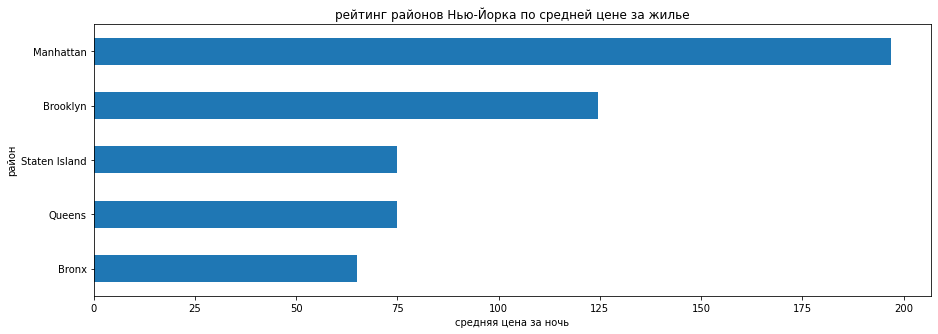

In [11]:
s.sort_values().plot(kind='barh', figsize=(15,5));
plt.title('рейтинг районов Нью-Йорка по средней цене за жилье');
plt.xlabel('средняя цена за ночь');
plt.ylabel('район');

Самые дорогие цены за жилье в районе Manhattan, причем они ощутимо выше, чем в следующем по рейтинге - Brooklyn. Далее цены не сильно меняются в зависимости от района. Но корреляция цены с райноном из данного графика очевидна.

### 2. 3 Также в таблице присутствует столбец room_type. Посмотрим как цены на жилье зависят от типа номера.

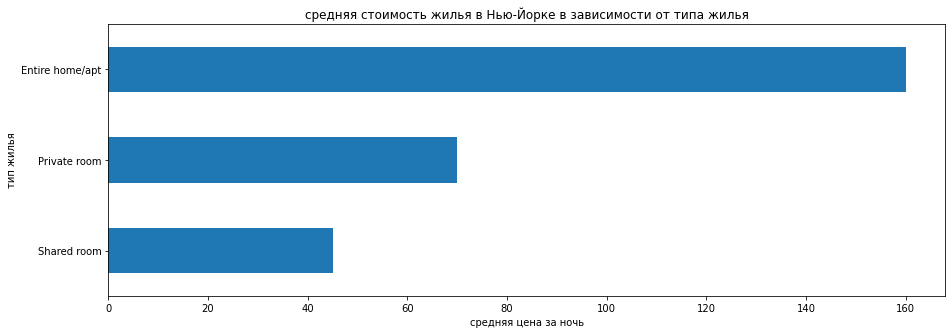

In [12]:
airbnb_clean[airbnb_clean.eval("price !=0")].groupby('room_type')['price'].median().sort_values().plot(kind='barh', figsize=(15,5));
plt.title('средняя стоимость жилья в Нью-Йорке в зависимости от типа жилья');
plt.xlabel('средняя цена за ночь');
plt.ylabel('тип жилья');

Места для жилья отличаются по цене в зависимости от типа жилья. Самые высокие цены выставлены на апартаменты и отдельные дома, далее идут отдельные комнаты. Самые дешевые - комнаты, которые придется делить с другими жильцами, например, хостелы.

### 2. 4 Проверим, сохраняется ли данное правило для цен за жилье в каждом районе:

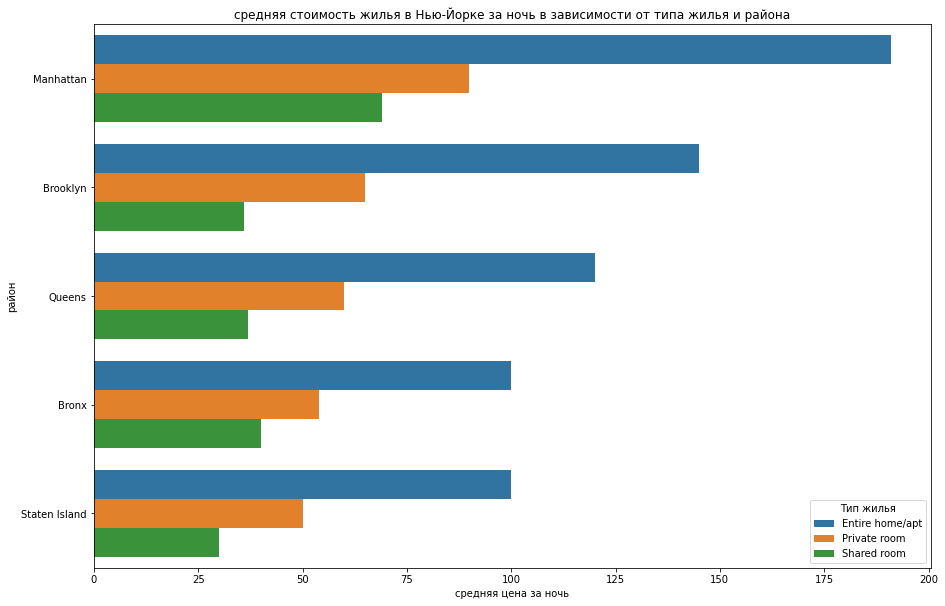

In [13]:
plt.figure(figsize=(15, 10));

g = airbnb_clean[airbnb_clean.eval(
    "price!=0")].groupby(['neighbourhood_group','room_type'])['price'].median().reset_index().sort_values(
    by ='price', ascending=False)

sns.barplot(y = 'neighbourhood_group',  x='price', hue ='room_type', data=g);
plt.title('средняя стоимость жилья в Нью-Йорке за ночь в зависимости от типа жилья и района');
plt.xlabel('средняя цена за ночь');
plt.ylabel('район');
plt.legend(title='Тип жилья', loc='best');

Действительно, cредняя цена в каждом районе убывает в зависимости от комфортабельности типа жилья.



# 3. Как места для аренды отличаются по отзывам ?

### 3.1 Посчитаем суммарное количество отзывов по районам:

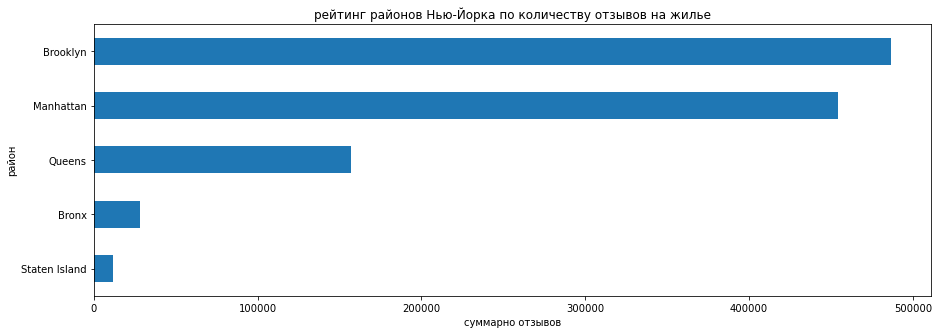

In [14]:
airbnb_clean.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values().plot(
    kind='barh', figsize = (15,5));
plt.title('рейтинг районов Нью-Йорка по количеству отзывов на жилье');
plt.xlabel('суммарно отзывов');
plt.ylabel('район');

Несмотря на то, что количество мест для жилья в Манхэттене больше, чем в Бруклине, он занимает второе место в данном рейтинге. Получается, что количество отзывов не обязательно зависит от популярности района. Проверим данную гипотезу.

### 3.2 Посмотрим распределение количества отзывов по районам

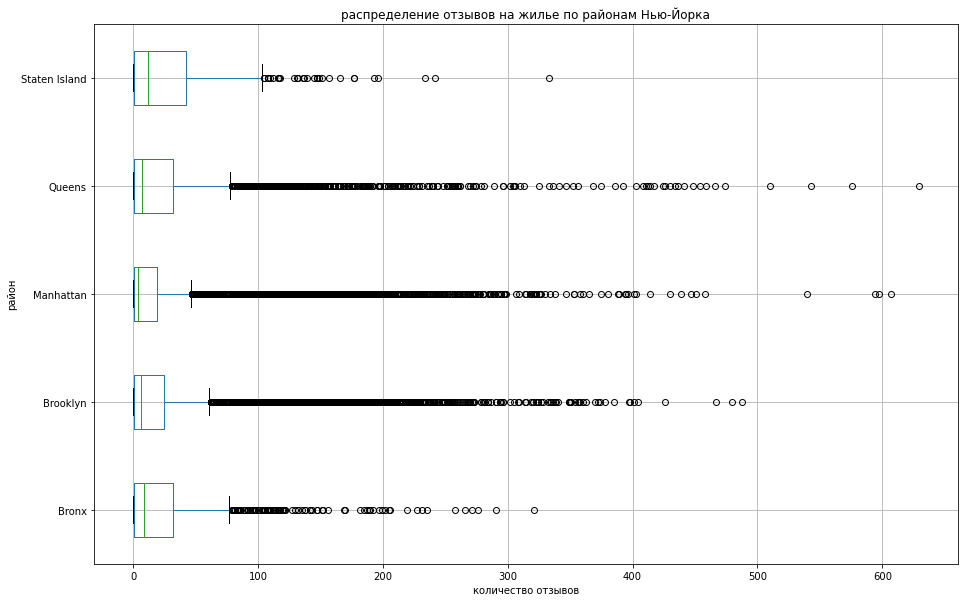

In [15]:
airbnb_clean.boxplot(column='number_of_reviews', by='neighbourhood_group',figsize=(15,10), vert=False);
plt.title('распределение отзывов на жилье по районам Нью-Йорка');
plt.xlabel('количество отзывов');
plt.ylabel('район');
plt.suptitle('');

Ящичная диаграмма показывает нам, что во всех районах наблются выбросы

Столбчатая диаграмма наглядно показывает, что в каждом районе распределение количества отзывов сильно скошено, поэтому для оценки среднего будем использовать медиану.

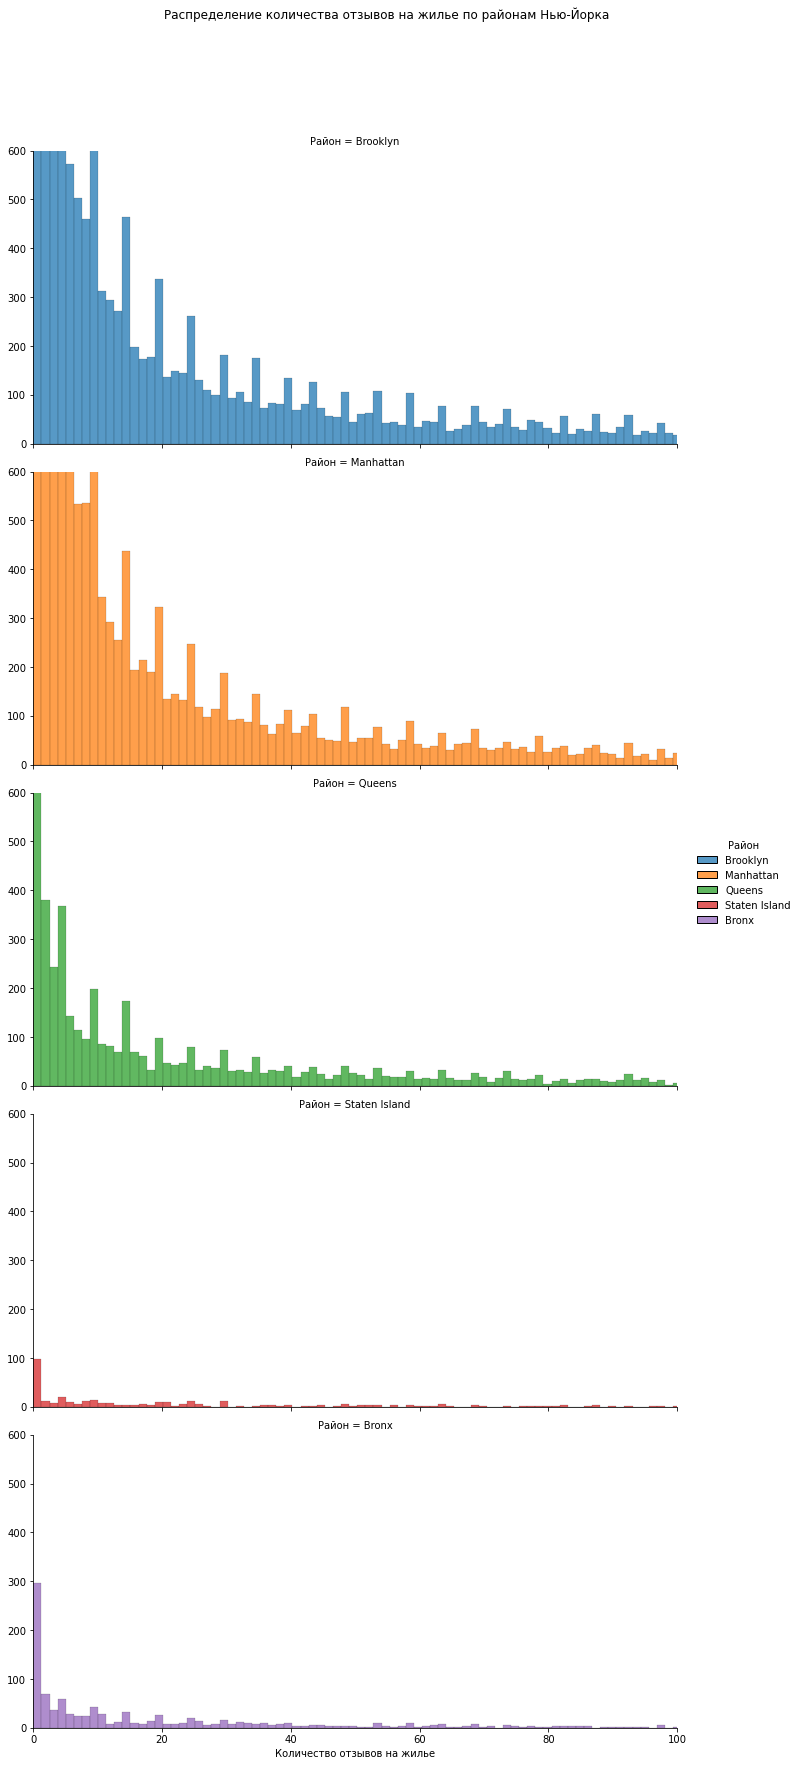

In [16]:
sns.displot(x='number_of_reviews', hue='Район', row='Район',
                data=airbnb_clean.rename({'neighbourhood_group' : 'Район'}, axis='columns'),aspect=2 
                ).set(ylabel=None);
plt.xlim(0,100);
plt.ylim(0,600);
plt.xlabel('Количество отзывов на жилье');
plt.subplots_adjust(top=0.9); 
plt.suptitle('Распределение количества отзывов на жилье по районам Нью-Йорка');

Число нулевых отзывов варьируется в зависимости от района от 16 до 20 %, что является существенной долей, поэтому этими данными пренебрегать не будем.

In [17]:
reviews_without_zeroes = airbnb_clean.query('number_of_reviews == 0').groupby(
    'neighbourhood_group')[['number_of_reviews']].count()
reviews_with_zeroes = airbnb_clean.groupby('neighbourhood_group')[['number_of_reviews']].count()

(reviews_without_zeroes / reviews_with_zeroes *100).round(0).rename(columns={
    'number_of_reviews':'процент нулевых отзывов'})


,процент нулевых отзывов
neighbourhood_group,
Bronx,20.0
Brooklyn,18.0
Manhattan,23.0
Queens,19.0
Staten Island,16.0


### 3.3 Посчитаем, сколько в среднем приходится отзывов на жилье в каждом районе:

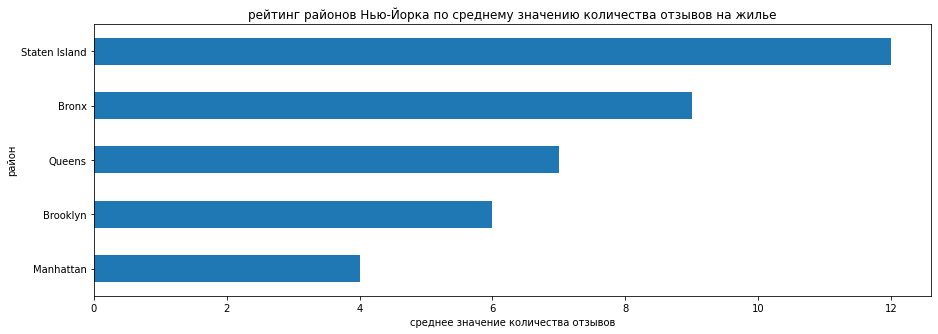

In [18]:
airbnb_clean.groupby('neighbourhood_group')['number_of_reviews'].median().sort_values().plot(
    kind='barh', figsize = (15,5));
plt.title('рейтинг районов Нью-Йорка по среднему значению количества отзывов на жилье');
plt.xlabel('среднее значение количества отзывов');
plt.ylabel('район');

Сопоставим это с рейтингом районов по количеству предлагаемого жилья:

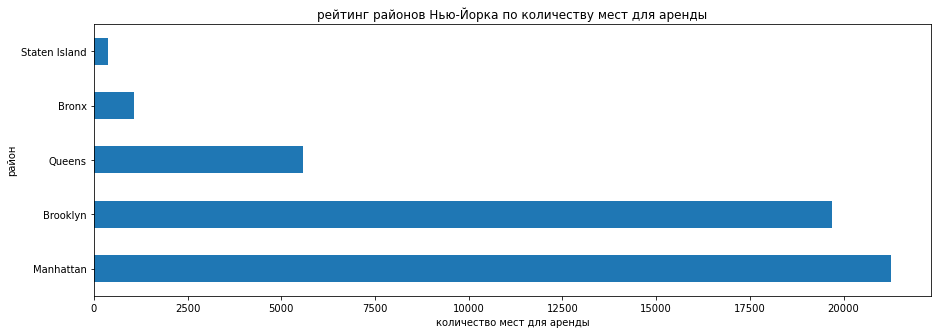

In [19]:
airbnb_clean.groupby('neighbourhood_group')['name'].nunique().sort_values(ascending=False).plot(kind='barh', figsize=(15,5));
plt.title('рейтинг районов Нью-Йорка по количеству мест для аренды');
plt.xlabel('количество мест для аренды');
plt.ylabel('район');

Получили интересную картину: среднее количество отзывов на жилье в районе отрицательно коррелирует с количеством мест для жилья в районе. Из этого можно предположить, что небольшое количество доступных мест для жилья не свидетельствует об отсутствии потребности у клиентов на жилье в данном районе, так как клиенты часто дают рефлексию, а значит, они заинтересованы. С другой стороны, стоит учесть, что огромная величина предложения от хостов в таких районах, как Манхэттен, Бруклин, размывает значение количества отзывов, а в районах с небольшим предложением мы имеем малую выборку, которая может неточно передавать реальную картину. 

Кроме того,  из данных графиков можно предположить, что чем больше сделок по аренде жилья совершается в районе, тем меньше клиенты склонны давать отзывы на жилье. Количество сделок может демонстрировать нам ритм жизни в городе, а от этого зависит поведение людей. С другой стороны в районе может наблюдаться большое количество отзывов, если он популярен для туризма, так как приехавший получить эмоции человек скорее всего захочет поделиться ими.
Как мы видим, дальнейшая интерпритация и подтверждение выдвинутых гипотез требует более грубокого анализа специфи районов Нью-Йорка. Мы же можем заявить только об очевидной корреляции этих значений.


###  3. 4 Какие по типу жилья квартиры имеют наибольшее количество отзывов? 

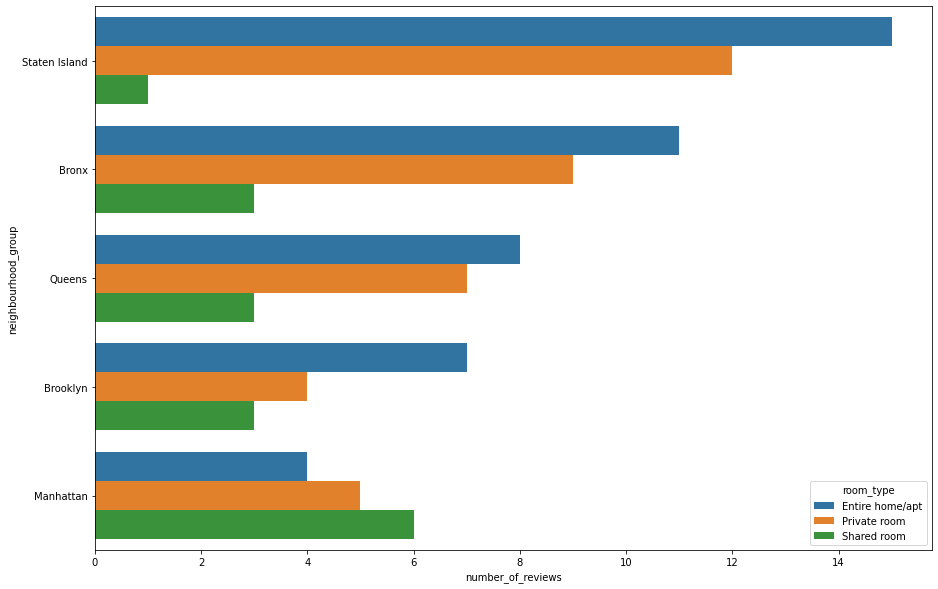

In [20]:

plt.figure(figsize=(15, 10));

v = airbnb_clean.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].median().reset_index().sort_values(by ='number_of_reviews', ascending=False)
sns.barplot(y = 'neighbourhood_group',  x='number_of_reviews', hue ='room_type', data=v);

Для всех районов кроме Манхэттэна наибольшее количество отзывов в среднем получает тип жилья Entire home/apt.
В Манхэттене наибольшее количество отзывов в среднем получает тип жилья Shared room 

### 3. 5 Влияют ли отзывы на цену аренды?

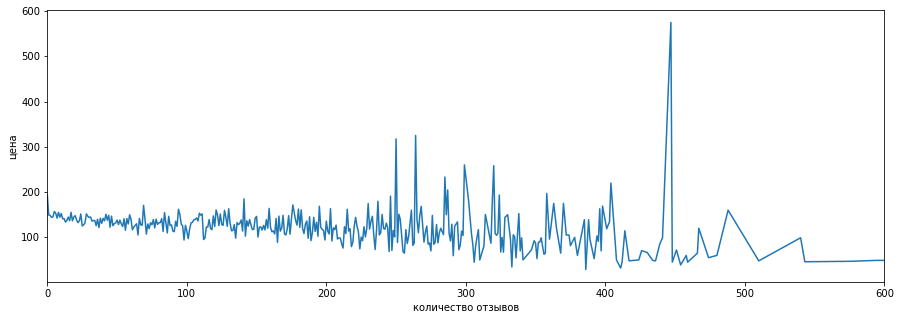

In [21]:
plt.figure(figsize=(15, 5));
axxx = sns.lineplot(x='number_of_reviews', y='price', data=airbnb_clean,
             ci = None);
plt.xlim(0,600);
plt.title('');
plt.xlabel('количество отзывов');
plt.ylabel('цена');

Из графика видно, что значение цены не коррелирует с количеством отзывов

 # 4. Зависит ли минимальный срок аренды от местоположения и типа жилья?

Для проверки данной гипотезы построим диаграмму средних значений минимального количества ночей за жилье по районам и типам жилья.

### 4.1 Сначала проанализируем данные по столбцу minimum_nights. Построим ящичную диаграмму для распределения значения минимального количества ночей по районам.

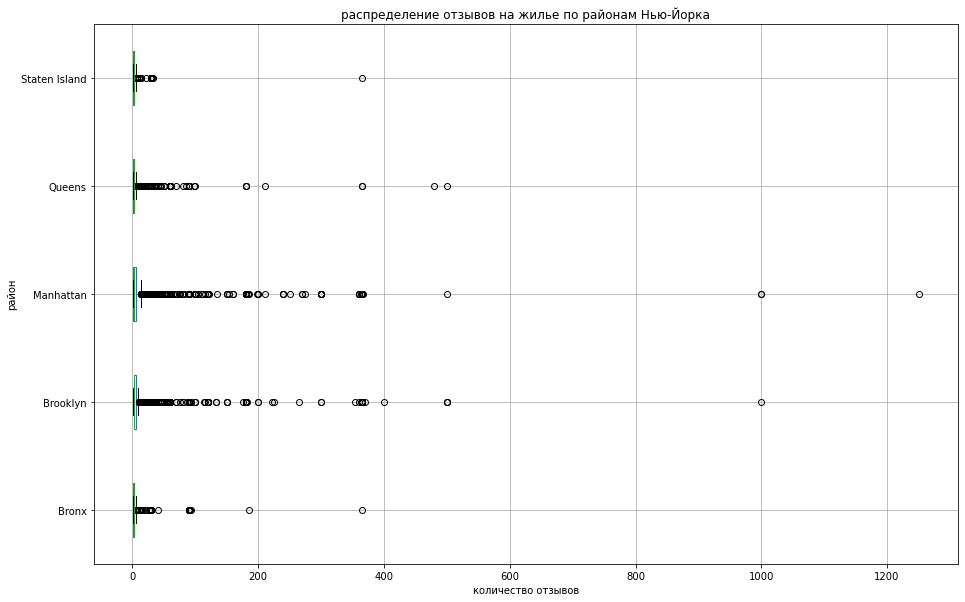

In [22]:
airbnb_clean.boxplot(column='minimum_nights', by='neighbourhood_group',figsize=(15,10), vert=False);
plt.title('распределение отзывов на жилье по районам Нью-Йорка');
plt.xlabel('количество отзывов');
plt.ylabel('район');
plt.suptitle('');

Пристутствуют странные значения, такие как 1250, 999, 500 минимальных ночей. Изучим данные сделки подробнее:

In [23]:
airbnb_clean.query('minimum_nights == 1250 or minimum_nights == 999 or minimum_nights == 500')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,NaN,1,362
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,NaN,1,358
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,NaN,1,331


Из таблицы видно, что такие аномальные значения по столбцу minimum_nights не являются ошибочными, так как для этих сделок присутствует реальный клиент и цена, уплаченная им. Следовательно, эти значения необходимо учетсть. И в таком случае, для оценки среднего количества минимальных ночей по районам стоит использвать медиану.

### 4.2 

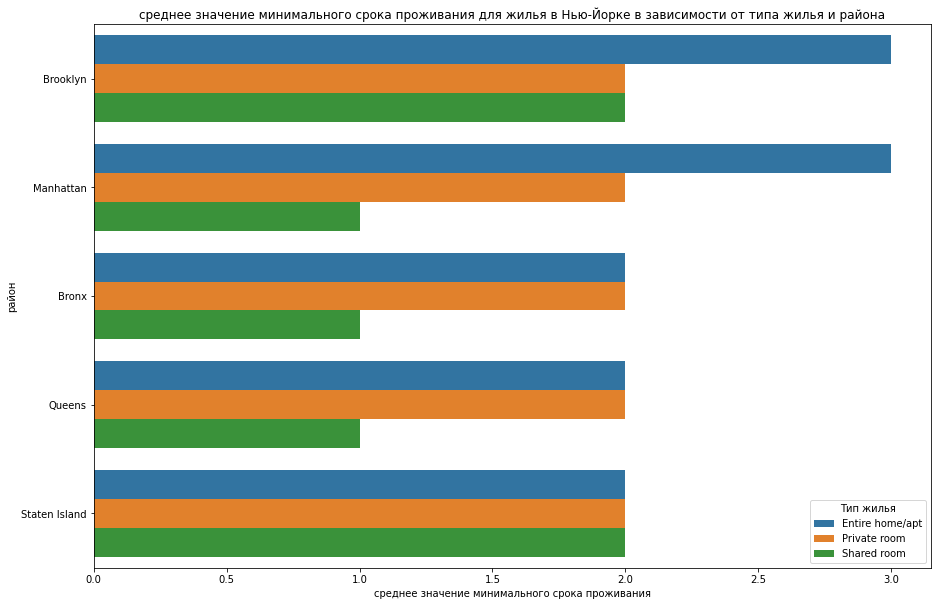

In [24]:
plt.figure(figsize=(15, 10));

k = airbnb_clean.groupby(['neighbourhood_group','room_type'])['minimum_nights'].median().reset_index().sort_values(
    by ='minimum_nights', ascending=False)

sns.barplot(y = 'neighbourhood_group',  x='minimum_nights', hue ='room_type', data=k);
plt.title('среднее значение минимального срока проживания для жилья в Нью-Йорке в зависимости от типа жилья и района');
plt.xlabel('среднее значение минимального срока проживания');
plt.ylabel('район');
plt.legend(title='Тип жилья', loc='best');

Из данного графика видно, что минимальное количество ночей по районам значительно отличается только для Манхэттена и Бруклина. Это можно обьяснить тем, что данные районы являются самыми дорогими и восстребоваными для Нью-Йорка. Для остальных районов минимальное количество ночей практически не отличается, несмотря на то, что они имеют разное количество доступного для аренды жилья.

Что касается зависимости от типа жилья, отдельная комната имеет такое же количество минимальных ночей как и дом/ апартаменты для 3х райнов из 5. Исключением являются уже упомянутые Манхэттен и Бруклин. В этих районах отдельные апартаменты и дом, являются редкостью, так как районы самые дорогие. Возможно, именно это обьясняет то, что количество минимальных ночей для аренды дома/апартаментов в этих районах выше по-сравнению с отдельной комантой.

Минимальное количество ночей для категории Shared room прогнозируемо ниже, чем в более дорогих категориях. Здесь исключением является Бруклин, где минимальное количество ночей за самую дешевую категорию и категорию Private room совпадают. А также район Staten Island, в котором минимальное количество ночей и вовсе не зависит от категории жилья. Предпложу, что такая картина наблюдается там из-за совсем малого количества доступного для аренды жилья. Спрос и предложение услуги ниже, поэтому на рынке жилья не прослеживается тенденция по увеличению минимального количества ночей для более дорогих категорий жилья.

В итоге, зависимость минимального количества ночей от района прослеживается для самых дорогих районов.

Зависимость минимального количества ночей от типа комнаты прослеживается во всех районах кроме района Staten Island, где отсутствие этой зависимости обьясянется наименьшим количеством доступного жилья среди всех остальных районов, и района Бруклин. Обьяснение отклонения от выявленной закономерности для Бруклина требует дополнительных данных по специфике районов и более глубокого анализа.

# 5.  Какие хосты наиболее заняты в течение года? Сделайте предположения почему.

### 5. 1 Посмотрим занятость хостов в зависимости от района и типа жилья:


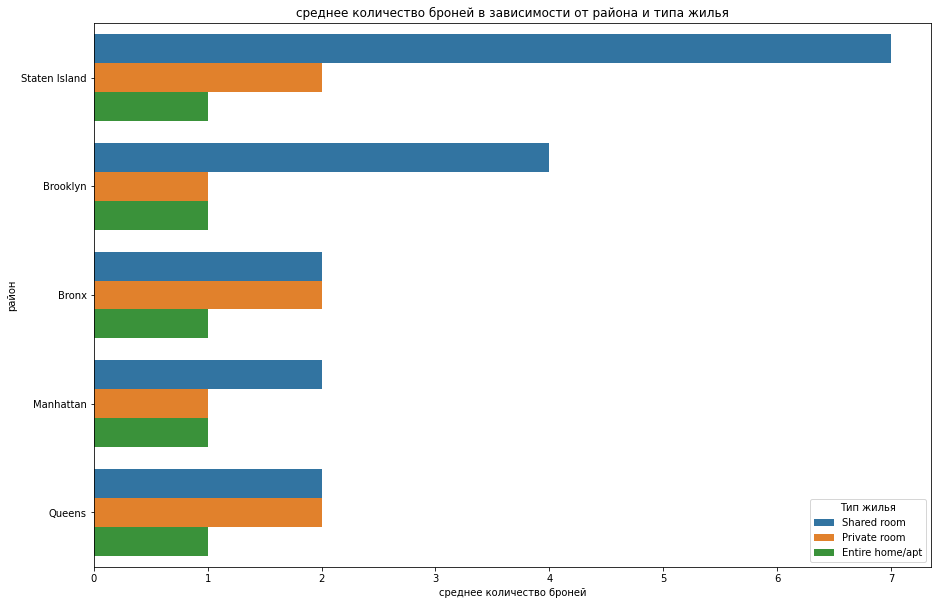

In [25]:
plt.figure(figsize=(15, 10));

с = airbnb_clean.groupby(['neighbourhood_group','room_type'])['calculated_host_listings_count'].median().reset_index().sort_values(
    by ='calculated_host_listings_count', ascending=False)

sns.barplot(y = 'neighbourhood_group',  x='calculated_host_listings_count', hue ='room_type', data=с);
plt.title('среднее количество броней в зависимости от района и типа жилья');
plt.xlabel('среднее количество броней');
plt.ylabel('район');
plt.legend(title='Тип жилья', loc='best');

Прослеживается зависимость занятости хостов от типа жилья: в каждом районе, за исключением Bronx и Queens, в которых среднее количество броней совпадает для типов жилья Shared room и Private room, самый занятый тип жилья - Shared room. Такая зависимость логична : хостелы - наиболее дешевые и популярный вид жилья, через который проходит большой поток людей.
Кроме того, для всех районов отдельный дом/апартаменты - самый низкий по количеству броней тип жилья. Он является самым дорогим, поэтому спрос на него ниже.

### 5. 2 Мы определили, что самые занятые в течение года хосты находятся в категориях Shared room по типу жилья. Теперь проверим, зависит ли количество броней от цены за жилье в данной категории:

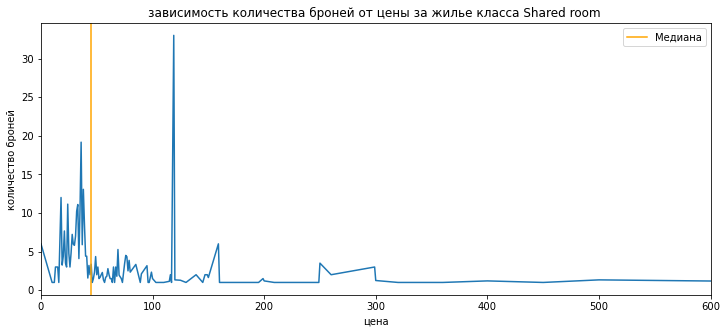

In [26]:
plt.figure(figsize=(12, 5))

ax = sns.lineplot(x='price', y='calculated_host_listings_count', data=airbnb_clean.query('room_type == "Shared room"'),
             ci = None);

ax.axvline(airbnb_clean.query('room_type == "Shared room"')['price'].median(), color = 'orange', label='Медиана');
ax.legend();
plt.xlim(0,600);
plt.title('зависимость количества броней от цены за жилье класса Shared room ');
plt.xlabel('цена');
plt.ylabel('количество броней');



Наиболее заняты хосты, которые предоставляют тип жилья - Shared room в ценовом диапазоне до 45 долларов за ночь ( медианное значение)

# 6. Какие по цене квартиры имеют наименьшее количество свободных дней в году?
Cтолбец availability_365 содержит информацию о том, сколько дней в году хотс предосталвяет жилье для аренды. Проверим, зависит ли от цены жилья количество свободных дней в году.

Мы уже определили, что на цену жилья сильнее всего влияет местоположение и тип жилья, поэтому разобьем жилье на ценовые категории по типам жилья. Дорогое - Entire home/apr, среднее - Private room, дешевое - Shared room. Кроме того, чем "дороже" район, в котором находится квартира с определенным типом жилья, по уже представленному выше рейтингу районов по средней цене на жилье, тем выше средняя цена квартиры.
Выявив корреляцию цены с типом жилья и районом, мы можем посмотреть как влияет тип жилья и расположение на количество свободных мест, и с помощью этого определить влияние ценового фактора.

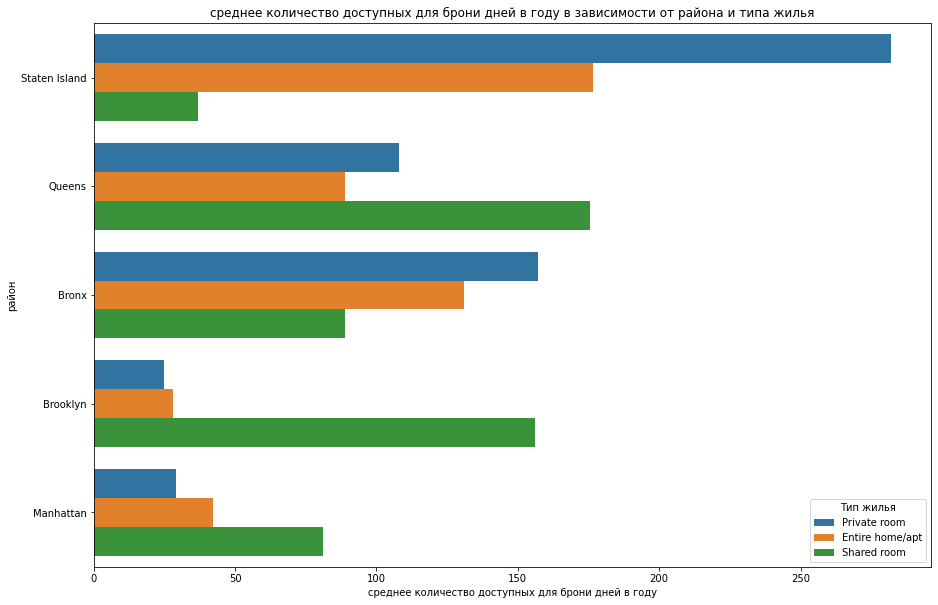

In [27]:
plt.figure(figsize=(15, 10));

j = airbnb_clean.groupby(['neighbourhood_group','room_type'])['availability_365'].median().reset_index().sort_values(
    by ='availability_365', ascending=False)

sns.barplot(y = 'neighbourhood_group',  x='availability_365', hue ='room_type', data=j);
plt.title('среднее количество доступных для брони дней в году в зависимости от района и типа жилья');
plt.xlabel('среднее количество доступных для брони дней в году');
plt.ylabel('район');
plt.legend(title='Тип жилья', loc='best');

Значение среднего количества свободных дней в году, как я считаю, демонстрирует нам восстребованность жилья. Ведь если клиенты будут предьевлять спрос на жилье, в среднем больше хостов будут готовы сдавать его чаще, чем если бы спроса на жилье не было. По скольку среднее количество доступных дней в году по районам само по себе нам не особо интересно, далее будем интерпретировать его как величину спроса на жилье в каждом районе.

На данном графике в очередной раз прослеживается зависимость спроса на определенный тип жилья от типа райнона, в котором данное жилье находится. Манхэттен, Бруклин - экономические центры, большое количество постоянно прилетающий и улетающий людей, поэтому хостелы там доступны в среднем больше всего, что является результатом высокого спроса на них. Queens - самый большой по населению после Бруклина и самый большой по территории район, поэтому там популярность хостелов так же объяснима. Staten Island - наиболее территориально удаленный район , в котором распространены частные дома, что и отражается на данном графике.

В итоге, каждый район в зависимости от своей специфики имеет свою категорию жилья, которое в среднем досутпно меньше всего дней в году, а значит является менее востребованным. Для дорогих районов, густонаселенных, с большим потоком приезжающих и уезжающих людей наименьшее количество свободных дней в году имеют самые дорогие по типу жилья квартиры. Также в Нью-Йорке присутствуют районы где исторически распространены отдельные дома, в таких районах наименьшую доступность имеют хостелы, из-за большей популярности частных домов.

# Вывод
Популяроность апартаментов в первую очередь определяет их расположение. Это отлично демонстрирует нам данный график:

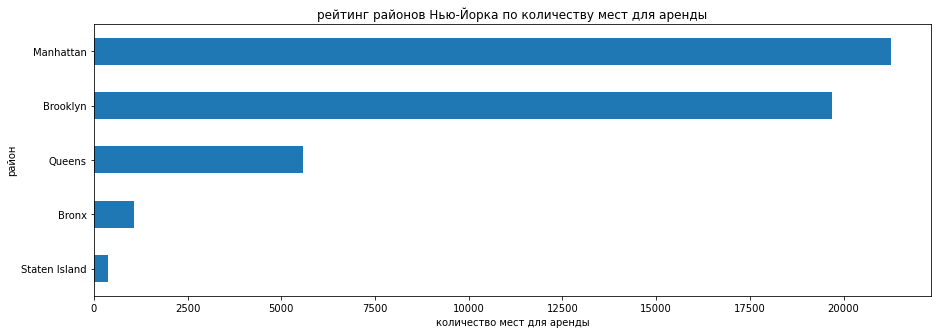

In [28]:
airbnb_clean.groupby('neighbourhood_group')['name'].nunique().sort_values().plot(kind='barh', figsize=(15,5));
plt.title('рейтинг районов Нью-Йорка по количеству мест для аренды');
plt.xlabel('количество мест для аренды');
plt.ylabel('район');

Высокий спрос подтверждает цена за ночь по районам:

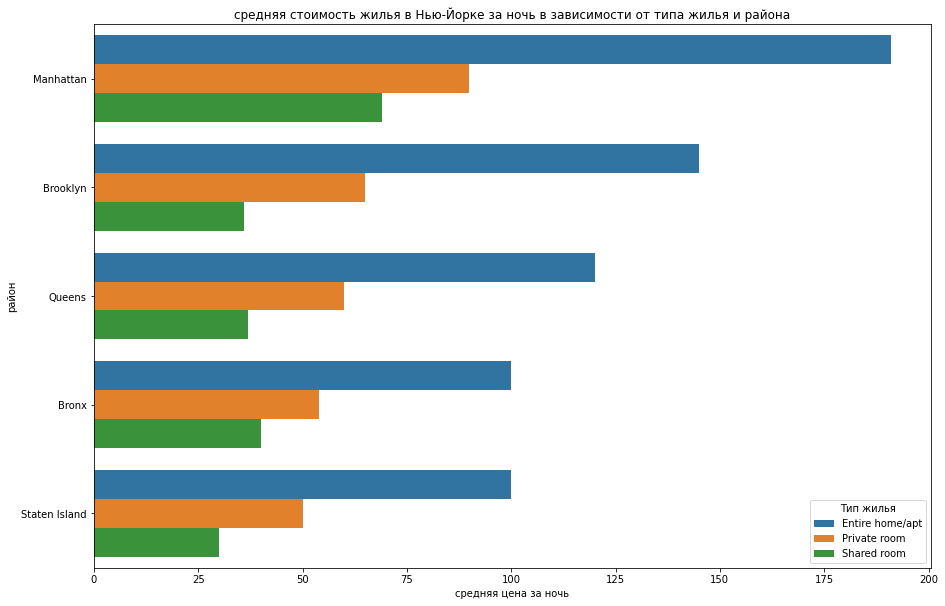

In [29]:
plt.figure(figsize=(15, 10));

g = airbnb_clean[airbnb_clean.eval(
    "price!=0")].groupby(['neighbourhood_group','room_type'])['price'].median().reset_index().sort_values(
    by ='price', ascending=False)

sns.barplot(y = 'neighbourhood_group',  x='price', hue ='room_type', data=g);
plt.title('средняя стоимость жилья в Нью-Йорке за ночь в зависимости от типа жилья и района');
plt.xlabel('средняя цена за ночь');
plt.ylabel('район');
plt.legend(title='Тип жилья', loc='best');

По среднему числу отзывов для каждого района мы понимаем, что в районах с низким рейтингом по количеству жилья для аренды присутствует спрос на услугу:

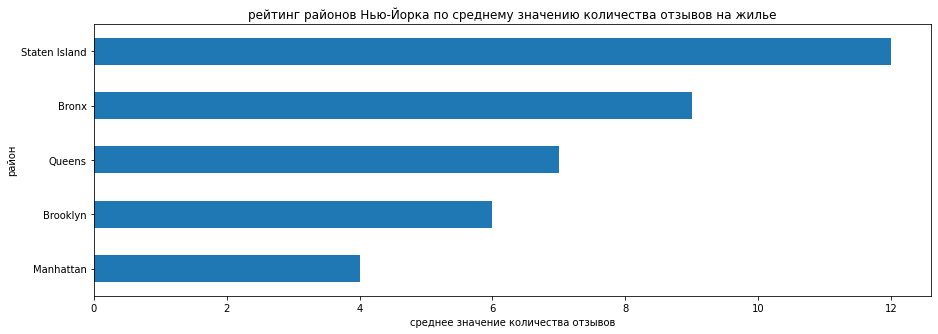

In [30]:
airbnb_clean.groupby('neighbourhood_group')['number_of_reviews'].median().sort_values().plot(
    kind='barh', figsize = (15,5));
plt.title('рейтинг районов Нью-Йорка по среднему значению количества отзывов на жилье');
plt.xlabel('среднее значение количества отзывов');
plt.ylabel('район');

На удивление количество отзывов не влияет на цену аренды жилья, данная гипотеза не подтвердилась: 

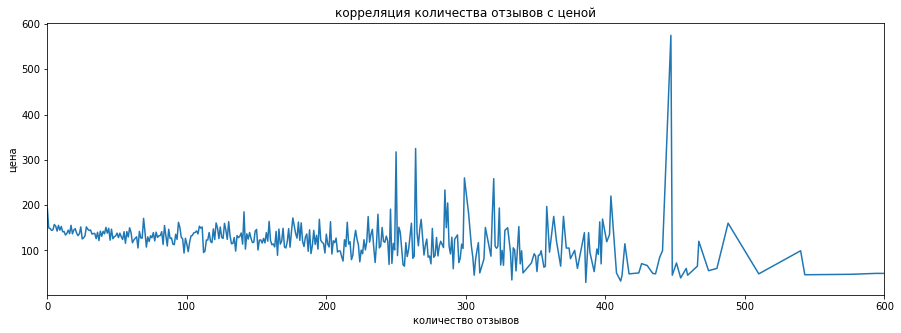

In [31]:
plt.figure(figsize=(15, 5));
axxx = sns.lineplot(x='number_of_reviews', y='price', data=airbnb_clean,
             ci = None);
plt.xlim(0,600);
plt.title('корреляция количества отзывов с ценой');
plt.xlabel('количество отзывов');
plt.ylabel('цена');



В Манхэттене и Бруклине высокое значение минимального количества ночей говорит о высоком спросе.
Во всех районах, кроме Stalen Island и Бруклин, низкое значение минимального количества ночей говорит нам о популярности хостелов:

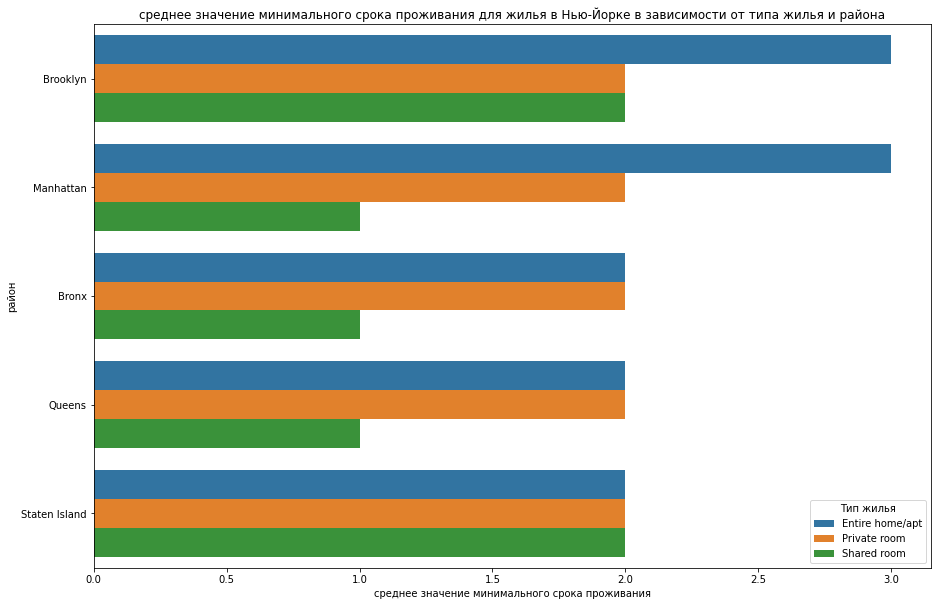

In [32]:
plt.figure(figsize=(15, 10));

k = airbnb_clean.groupby(['neighbourhood_group','room_type'])['minimum_nights'].median().reset_index().sort_values(
    by ='minimum_nights', ascending=False)

sns.barplot(y = 'neighbourhood_group',  x='minimum_nights', hue ='room_type', data=k);
plt.title('среднее значение минимального срока проживания для жилья в Нью-Йорке в зависимости от типа жилья и района');
plt.xlabel('среднее значение минимального срока проживания');
plt.ylabel('район');
plt.legend(title='Тип жилья', loc='best');

Благодаря анализу занятости хостов по типу жилья и району, мы выяснили, что самые загруженные в течение года хосты - хосты, предоставляющие тип жилья Shared room, которые предоставляют услуги в ценовом диапазоне до 45 долларов:

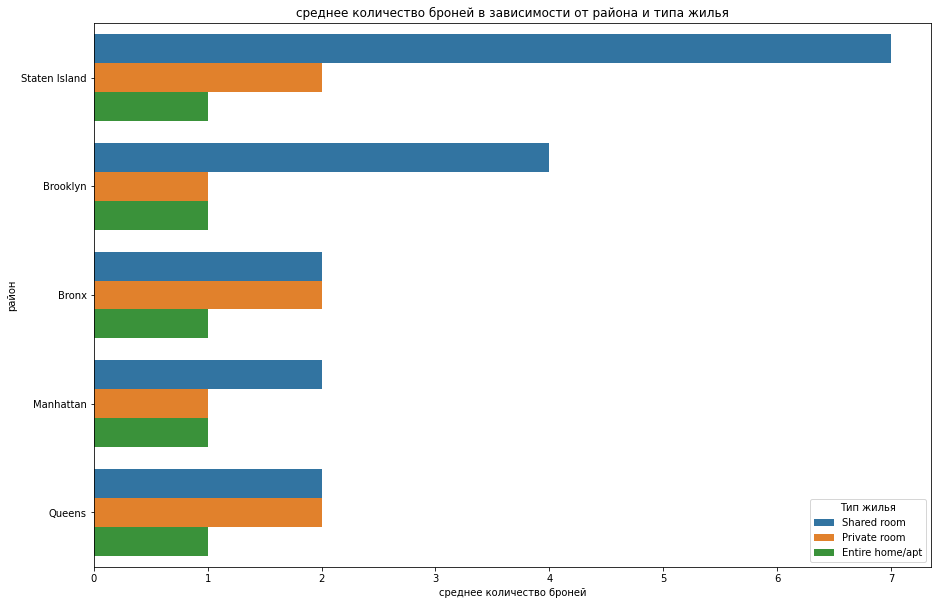

In [33]:
plt.figure(figsize=(15, 10));

с = airbnb_clean.groupby(['neighbourhood_group','room_type'])['calculated_host_listings_count'].median().reset_index().sort_values(
    by ='calculated_host_listings_count', ascending=False)

sns.barplot(y = 'neighbourhood_group',  x='calculated_host_listings_count', hue ='room_type', data=с);
plt.title('среднее количество броней в зависимости от района и типа жилья');
plt.xlabel('среднее количество броней');
plt.ylabel('район');
plt.legend(title='Тип жилья', loc='best');

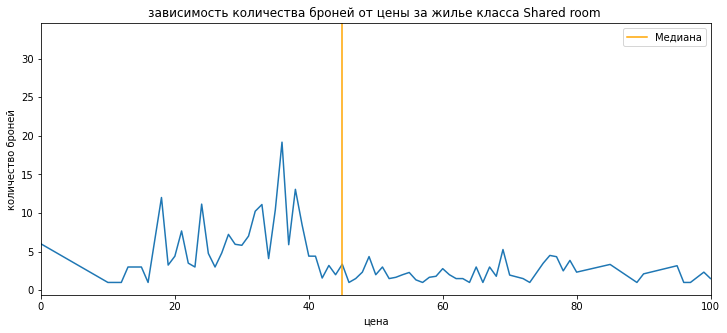

In [34]:
plt.figure(figsize=(12, 5))

ax = sns.lineplot(x='price', y='calculated_host_listings_count', data=airbnb_clean.query('room_type == "Shared room"'),
             ci = None);

ax.axvline(airbnb_clean.query('room_type == "Shared room"')['price'].median(), color = 'orange', label='Медиана');
ax.legend();
plt.xlim(0,100);
plt.title('зависимость количества броней от цены за жилье класса Shared room ');
plt.xlabel('цена');
plt.ylabel('количество броней');